## Labs
Built-in functions available in popular toolboxes:
scipy.ndimage package (the morphology component)
skimage.morphology package from scikit-image
but can be recoded from scratch as well.
Practice:
1. Threshold a grayscale or panchromatic/NDVI image or consider a binary land
cover map.
2. Compare the effect of erosion, dilation, opening, closing with different
structuring elements.
3. Apply the more advanced morphological operators on the image.
4. Assess (visually) the relevance of the opening transform.

In [3]:
!uv pip install rasterio

Using Python 3.12.11 environment at: /Users/saharmohamed/Documents/UBS_Material/IP/.venv
Resolved 9 packages in 351ms                                         
⠙ Preparing packages... (0/1)                                                   
⠙ Preparing packages... (0/1)--------------     0 B/105.74 KiB          
⠙ Preparing packages... (0/1)-------------- 16.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)-------------- 32.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)-------------- 48.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)----------- 64.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)---------- 80.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)---------- 96.00 KiB/105.74 KiB        
⠙ Preparing packages... (0/1)---------- 105.74 KiB/105.74 KiB       
Prepared 1 package in 63ms                                                   
Installed 7 packages in 13ms                                
 + affine==2.4.0
 + attrs==25.4.0
 + certifi==2025.1

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/3417205417.py:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(img_array)


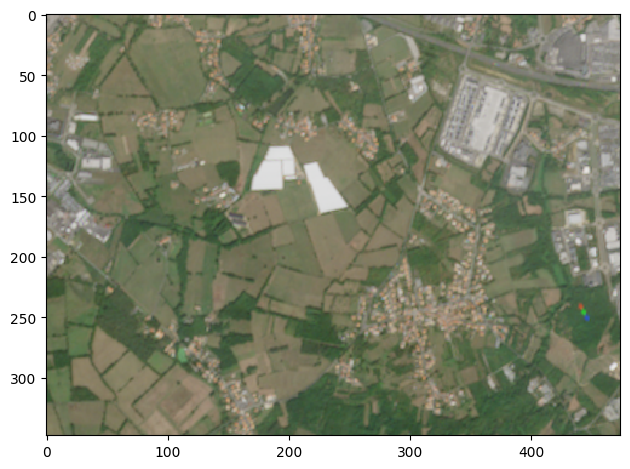

In [12]:
import skimage.io as io
import rasterio
import numpy as np

## raad img tif and convert to numpy array for dispalying
img = rasterio.open('S2_L2A_RBG.tiff')
img_array = img.read()
img_array = np.moveaxis(img_array, 0, -1)  # Move channels to last dimension
io.imshow(img_array)


In [10]:
img.shape

(348, 474)

In [11]:
img_array.shape

(3, 348, 474)

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/1144735107.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gray_img)


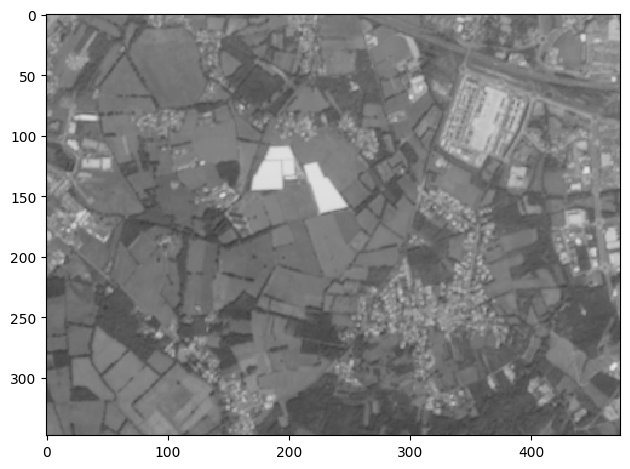

In [15]:
## convert img to gayscale
from skimage import color

gray_img = color.rgb2gray(img_array)
io.imshow(gray_img)

In [16]:
gray_img.shape

(348, 474)

#### I will use here the otsu threshold as it will fimd the optinmal value of thresholding. It calculates an “optimal” threshold (marked by a red line in the histogram below) by maximizing the variance between two classes of pixels, which are separated by the threshold. Equivalently, this threshold minimizes the intra-class variance. 

Documnetation: https://scikit-image.org/docs/stable/auto_examples/applications/plot_thresholding_guide.html


/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/1783080208.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(binary)


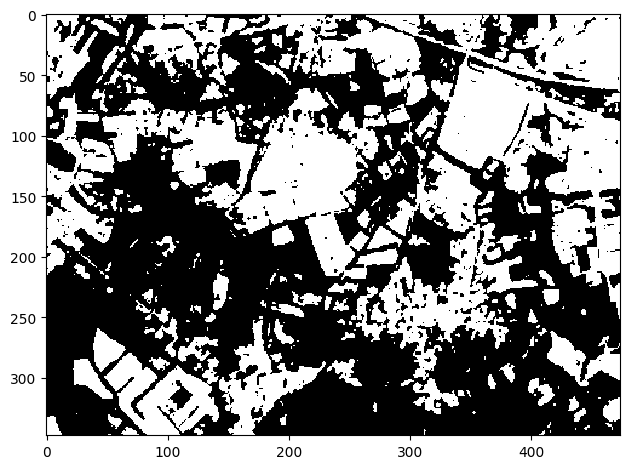

In [ ]:
## threshold and filter grayimage
from skimage import filters
thresh = filters.threshold_otsu(gray_img)
binary = gray_img > thresh
io.imshow(binary)

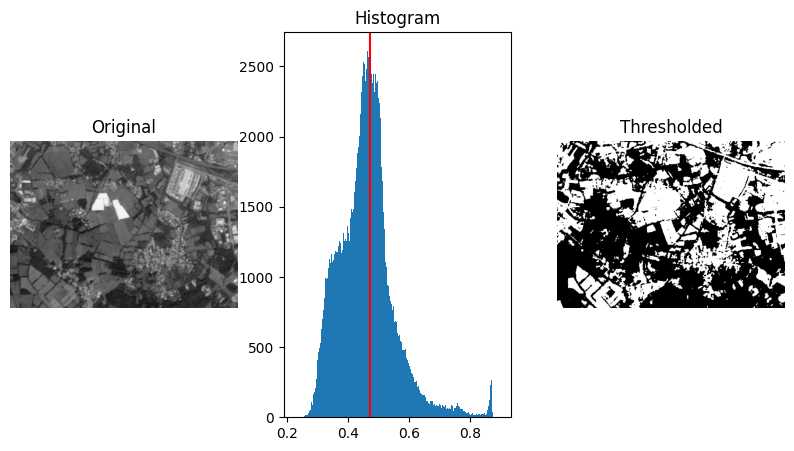

In [ ]:
## display original, histogram, and thresholded images
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=3, figsize=(10, 5))

ax[0].imshow(gray_img, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(gray_img.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].set_axis_off()

plt.show()

In [21]:
binary

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]], shape=(348, 474))

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/2792048655.py:3: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  se1 = morph.square(5)


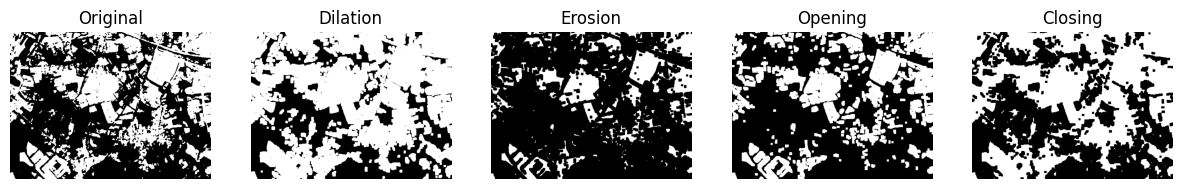

In [ ]:
## applying morphological operations
import skimage.morphology as morph
se1 = morph.square(5)
dilated = morph.dilation(binary, se1)
eroded = morph.erosion(binary, se1)
opened = morph.opening(binary, se1)
closed = morph.closing(binary, se1)

fig, ax = plt.subplots(ncols=5, figsize=(15, 10))
ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(dilated, cmap=plt.cm.gray)
ax[1].set_title('Dilation')
ax[1].axis('off')
ax[2].imshow(eroded, cmap=plt.cm.gray)
ax[2].set_title('Erosion')
ax[2].axis('off')
ax[3].imshow(opened, cmap=plt.cm.gray)
ax[3].set_title('Opening')
ax[3].axis('off')
ax[4].imshow(closed, cmap=plt.cm.gray)
ax[4].set_title('Closing')
ax[4].axis('off')
plt.show()


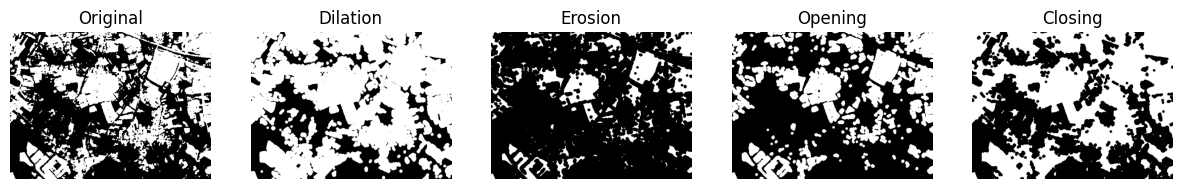

In [25]:
from skimage.morphology import erosion, dilation, opening, closing, disk, square

se2 = disk(3)

erosion_img = erosion(binary, se2)
dilation_img = dilation(binary, se2)
opening_img = opening(binary, se2)
closing_img = closing(binary, se2)

fig, ax = plt.subplots(ncols=5, figsize=(15, 10))
ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].imshow(dilation_img, cmap=plt.cm.gray)
ax[1].set_title('Dilation')
ax[1].axis('off')

ax[2].imshow(erosion_img, cmap=plt.cm.gray)
ax[2].set_title('Erosion')
ax[2].axis('off')

ax[3].imshow(opening_img, cmap=plt.cm.gray)
ax[3].set_title('Opening')
ax[3].axis('off')

ax[4].imshow(closing_img, cmap=plt.cm.gray)
ax[4].set_title('Closing')
ax[4].axis('off')
plt.show()


### Advanced Morphological operations

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/345199063.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(gradient, cmap='gray')
/Users/saharmohamed/Documents/UBS_Material/IP/.venv/lib/python3.12/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


Text(0.5, 1.0, 'Morphological Gradient')

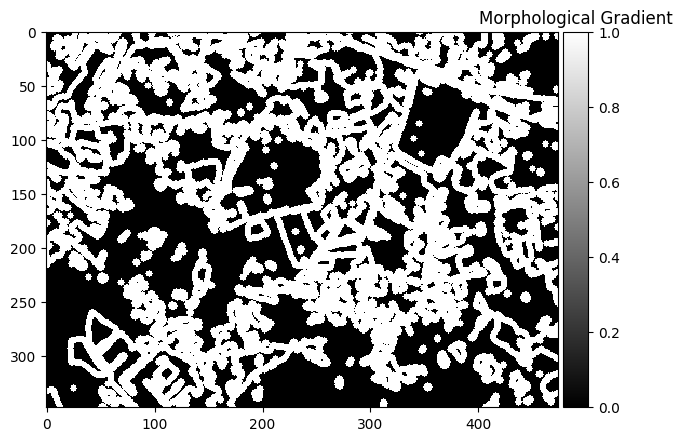

In [28]:
import numpy as np

dil = morph.dilation(binary, disk(3)).astype(int)
ero = morph.erosion(binary, disk(3)).astype(int)

gradient = dil - ero

io.imshow(gradient, cmap='gray')
plt.title('Morphological Gradient')



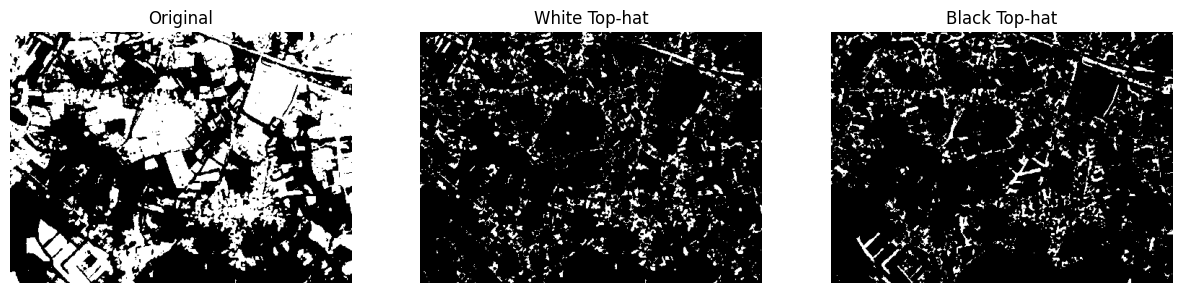

In [32]:
from skimage.morphology import white_tophat, black_tophat
tophat = white_tophat(binary, disk(3))
blackhat = black_tophat(binary, disk(3))

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off') 
ax[1].imshow(tophat, cmap=plt.cm.gray)
ax[1].set_title('White Top-hat')
ax[1].axis('off')
ax[2].imshow(blackhat, cmap=plt.cm.gray)
ax[2].set_title('Black Top-hat')
ax[2].axis('off')
plt.show()



/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/3261536355.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(reconstructed, cmap='gray')


Text(0.5, 1.0, 'Reconstructed Image')

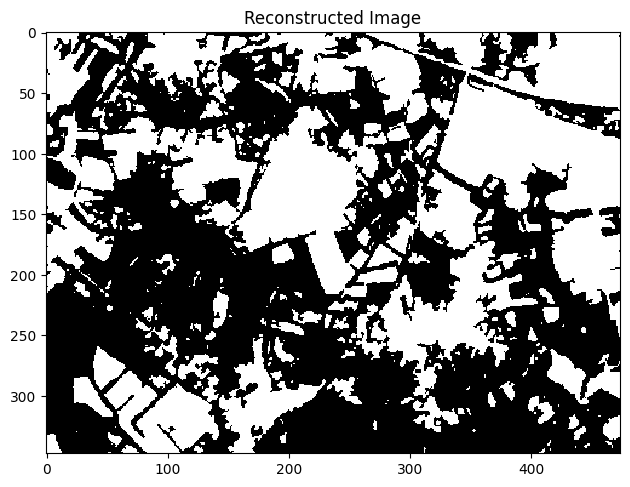

In [33]:
## recontruction 
from skimage.morphology import reconstruction
seed = np.copy(binary)
seed[1:-1, 1:-1] = binary.max()
mask = binary
reconstructed = reconstruction(seed, mask, method='erosion')
io.imshow(reconstructed, cmap='gray')
plt.title('Reconstructed Image')


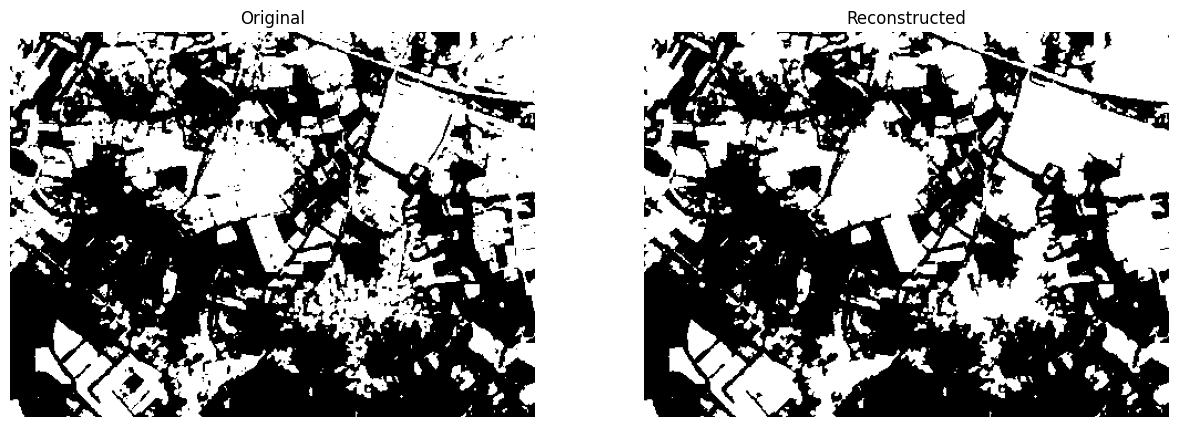

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off') 
ax[1].imshow(reconstructed, cmap=plt.cm.gray)
ax[1].set_title('Reconstructed')
ax[1].axis('off')
plt.show()

/var/folders/zw/hnw6kqc132g470mk8rsyp5400000gn/T/ipykernel_65162/624732419.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(skeleton, cmap='gray')


Text(0.5, 1.0, 'Skeletonized Image')

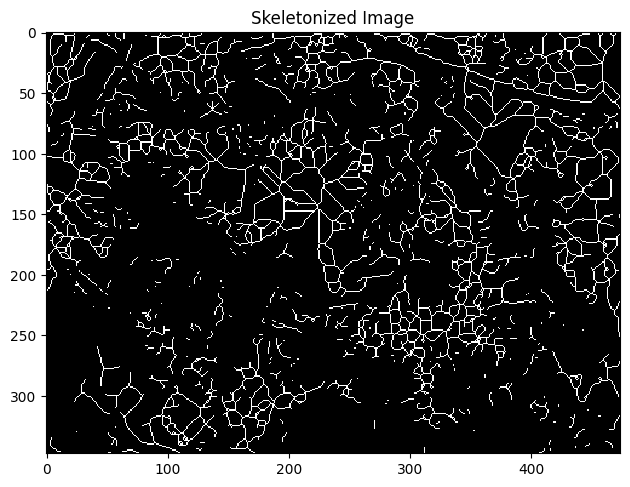

In [35]:
### Skeletonization
from skimage.morphology import skeletonize
skeleton = skeletonize(binary)
io.imshow(skeleton, cmap='gray')
plt.title('Skeletonized Image')


### from SkimageDoc:
### the medial axis transform to compute the width of the foreground objects. As the function medial_axis returns the distance transform in addition to the medial axis (with the keyword argument return_distance=True), it is possible to compute the distance to the background for all points of the medial axis with this function. This gives an estimate of the local width of the objects.

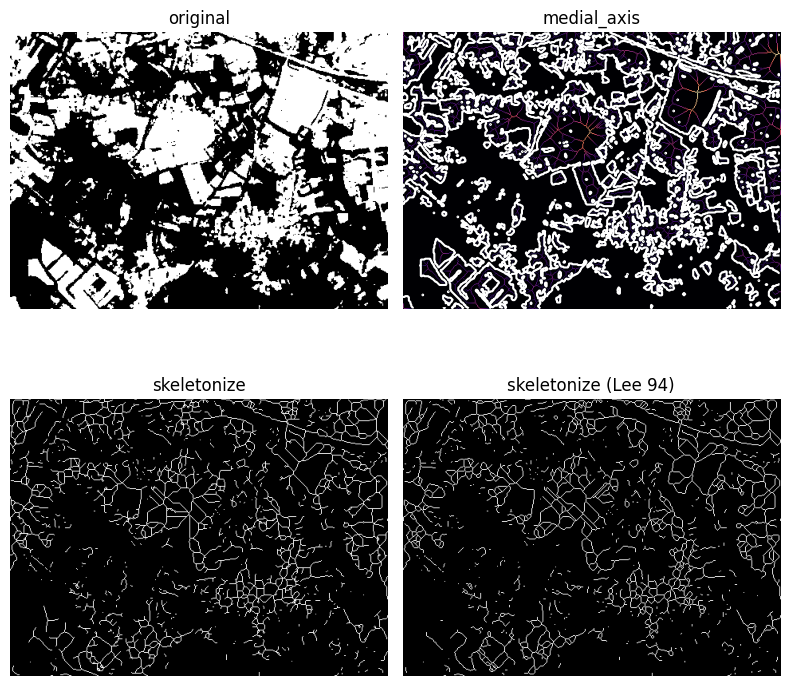

In [36]:
from skimage.morphology import medial_axis, skeletonize

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(binary, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(binary)
skeleton_lee = skeletonize(binary, method='lee')

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap='magma')
ax[1].contour(binary, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray)
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton_lee, cmap=plt.cm.gray)
ax[3].set_title("skeletonize (Lee 94)")
ax[3].axis('off')

fig.tight_layout()
plt.show()

## Thininng

### Morphological thinning, implemented in the thin function, works on the same principle as skeletonize: remove pixels from the borders at each iteration until none can be removed without altering the connectivity. The different rules of removal can speed up skeletonization and result in different final skeletons.

The thin function also takes an optional max_num_iter keyword argument to limit the number of thinning iterations, and thus produce a relatively thicker skeleton.

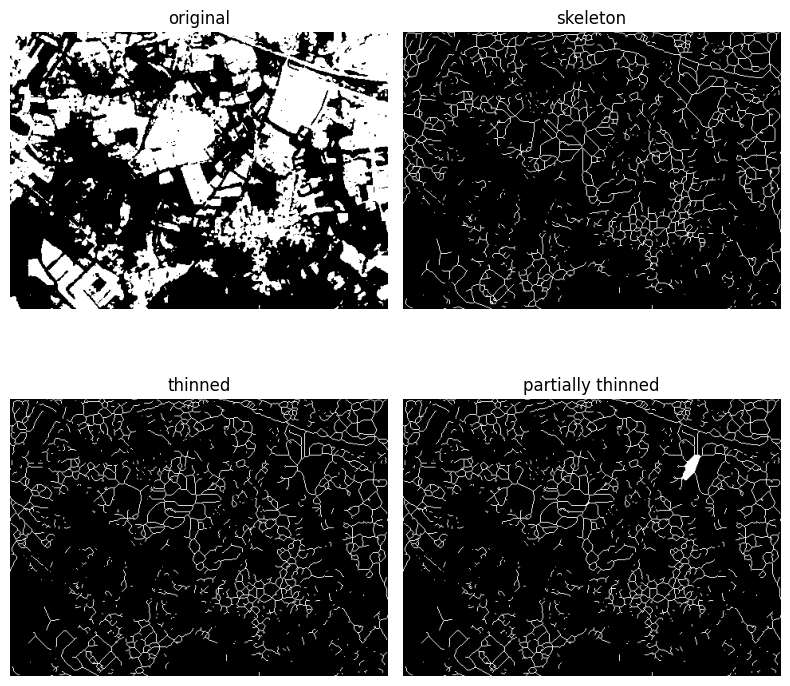

In [37]:
from skimage.morphology import skeletonize, thin

skeleton = skeletonize(binary)
thinned = thin(binary)
thinned_partial = thin(binary, max_num_iter=25) #partial thinning 

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton')
ax[1].axis('off')

ax[2].imshow(thinned, cmap=plt.cm.gray)
ax[2].set_title('thinned')
ax[2].axis('off')

ax[3].imshow(thinned_partial, cmap=plt.cm.gray)
ax[3].set_title('partially thinned')
ax[3].axis('off')

fig.tight_layout()
plt.show()

## Conex Hull

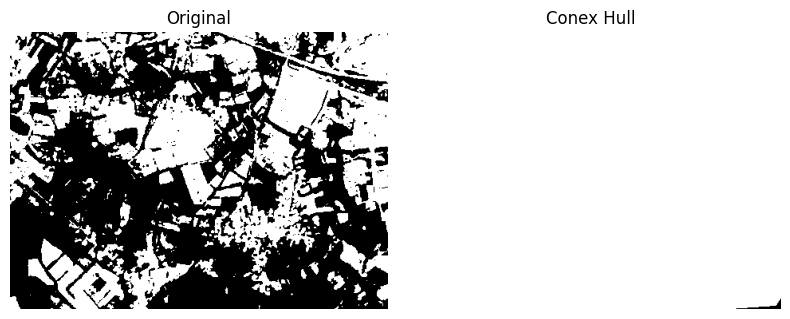

In [39]:
from skimage.morphology import convex_hull_image
from skimage.util import invert

chull = convex_hull_image(binary)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original')
ax[0].imshow(binary, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Conex Hull')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

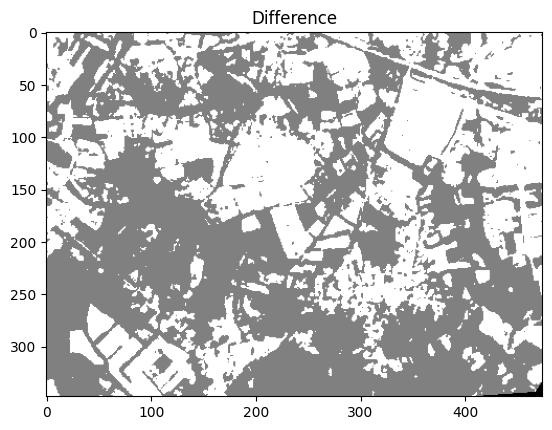

In [40]:
from skimage import img_as_float
chull_diff = img_as_float(chull.copy())
chull_diff[binary] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray)
ax.set_title('Difference')
plt.show()

### Extracted connected components

## Prunning

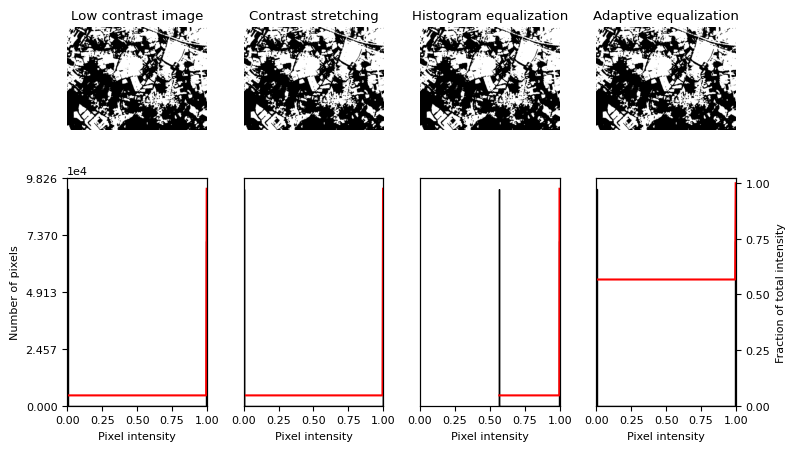

In [43]:
from skimage import exposure
import matplotlib
matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = binary.astype(float)

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1 + i, sharex=axes[0, 0], sharey=axes[0, 0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5 + i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

### Graunomatelly